This notebook is for gathering data on sunset times at two different locations and representing those data graphically.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import data from csv files and view it.

In [71]:
fwdata = pd.read_csv('data/fw-data.csv')
print(fwdata)

       2022 sunrise time   Zenith FW Sunset Day length  \
0    01-Jan      9:58 AM  1:25 PM   4:51 PM   06:52:56   
1    02-Jan      9:58 AM  1:25 PM   4:52 PM   06:54:29   
2    03-Jan      9:57 AM  1:26 PM   4:54 PM   06:56:11   
3    04-Jan      9:57 AM  1:26 PM   4:55 PM   06:58:01   
4    05-Jan      9:56 AM  1:26 PM   4:56 PM   06:59:58   
..      ...          ...      ...       ...        ...   
360  27-Dec      9:59 AM  1:22 PM   4:46 PM   06:46:58   
361  28-Dec      9:59 AM  1:23 PM   4:47 PM   06:47:48   
362  29-Dec      9:59 AM  1:23 PM   4:47 PM   06:48:47   
363  30-Dec      9:59 AM  1:24 PM   4:49 PM   06:49:54   
364  31-Dec      9:58 AM  1:24 PM   4:50 PM   06:51:09   

    Astronomical twilight start Nautical twilight start Civil twilight start  \
0                         +1:26                 7:33 AM              8:19 AM   
1                         +1:33                 7:33 AM              8:19 AM   
2                         +1:42                 7:33 AM        

In [72]:
cfdata = pd.read_csv('data/cf-data.csv')
print(cfdata)

       2022 sunrise time   Zenith CF Sunset Day length  \
0    01-Jan      9:19 AM  1:17 PM   5:15 PM   07:55:17   
1    02-Jan      9:19 AM  1:17 PM   5:16 PM   07:56:28   
2    03-Jan      9:19 AM  1:18 PM   5:17 PM   07:57:44   
3    04-Jan      9:19 AM  1:18 PM   5:18 PM   07:59:06   
4    05-Jan      9:18 AM  1:19 PM   5:19 PM   08:00:34   
..      ...          ...      ...       ...        ...   
360  27-Dec      9:19 AM  1:14 PM   5:10 PM   07:50:51   
361  28-Dec      9:19 AM  1:15 PM   5:11 PM   07:51:28   
362  29-Dec      9:19 AM  1:15 PM   5:12 PM   07:52:12   
363  30-Dec      9:19 AM  1:16 PM   5:12 PM   07:53:01   
364  31-Dec      9:19 AM  1:16 PM   5:13 PM   07:53:58   

    Astronomical twilight start Nautical twilight start Civil twilight start  \
0                         +1:03                 7:16 AM              7:56 AM   
1                         +1:11                 7:16 AM              7:56 AM   
2                         +1:16                 7:16 AM        

print list of columns in dataframes.

In [73]:
print(list(fwdata))
print(list(cfdata))

['2022', 'sunrise time', 'Zenith', 'FW Sunset', 'Day length', 'Astronomical twilight start', 'Nautical twilight start', 'Civil twilight start', 'Civil twilight end', 'Nautical twilight end', 'Astronomical twilight end', 'Unnamed: 11']
['2022', 'sunrise time', 'Zenith', 'CF Sunset', 'Day length', 'Astronomical twilight start', 'Nautical twilight start', 'Civil twilight start', 'Civil twilight end', 'Nautical twilight end', 'Astronomical twilight end', 'Unnamed: 11']


Remove extraneous columns from dataframes.

In [74]:
fwdata.drop(["sunrise time", "Zenith", "Day length", "Astronomical twilight start", "Nautical twilight start", 'Civil twilight start', 'Civil twilight end', 'Nautical twilight end', 'Astronomical twilight end', 'Unnamed: 11'], axis = 1, inplace = True)
print(list(fwdata))
cfdata.drop(["sunrise time", "Zenith", "Day length", "Astronomical twilight start", "Nautical twilight start", 'Civil twilight start', 'Civil twilight end', 'Nautical twilight end', 'Astronomical twilight end', 'Unnamed: 11'], axis = 1, inplace = True)
print(list(cfdata))

['2022', 'FW Sunset']
['2022', 'CF Sunset']


merge dataframes

In [75]:
sunsetdata = pd.merge(fwdata, cfdata)
sunsetdata

,2022,FW Sunset,CF Sunset
0,01-Jan,4:51 PM,5:15 PM
1,02-Jan,4:52 PM,5:16 PM
2,03-Jan,4:54 PM,5:17 PM
3,04-Jan,4:55 PM,5:18 PM
4,05-Jan,4:56 PM,5:19 PM
...,...,...,...
360,27-Dec,4:46 PM,5:10 PM
361,28-Dec,4:47 PM,5:11 PM
362,29-Dec,4:47 PM,5:12 PM
363,30-Dec,4:49 PM,5:12 PM


remove 'PM' from time columns

In [76]:
sunsetdata['FW Sunset'] = sunsetdata['FW Sunset'].str.replace(' PM','')
sunsetdata['CF Sunset'] = sunsetdata['CF Sunset'].str.replace(' PM','')

replace ':' with '.' 

In [77]:
sunsetdata['FW Sunset'] = sunsetdata['FW Sunset'].str.replace(':','.')
sunsetdata['CF Sunset'] = sunsetdata['CF Sunset'].str.replace(':','.')

convert int to float

In [79]:
sunsetdata['FW Sunset'] = sunsetdata['FW Sunset'].astype(float)
sunsetdata['CF Sunset'] = sunsetdata['CF Sunset'].astype(float)
sunsetdata.dtypes

2022          object
FW Sunset    float64
CF Sunset    float64
dtype: object

add column with ascending values

In [80]:
sunsetdata['Number'] = np.arange(sunsetdata.shape[0])
sunsetdata.dtypes

2022          object
FW Sunset    float64
CF Sunset    float64
Number         int64
dtype: object

In [ ]:
#fwdata['FW Sunset'] = pd.to_datetime(fwdata['FW Sunset']).dt.time
#cfdata['CF Sunset'] = pd.to_datetime(cfdata['CF Sunset']).dt.time

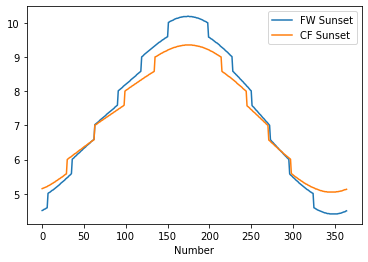

In [82]:
sunsetdata.plot(x = 'Number', y = ['FW Sunset', 'CF Sunset'])
plt.show()

In [ ]:
#plt.plot_date(['2022'], ['FW Sunset', 'CF Sunset'])